In [87]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

# Data Load

In [88]:
# Read given audio file's path and respective emotion from the file name and create a dataframe
def read_audio_data(data_dir, aud_src_list):
    columns = []
    for aud_dir in aud_src_list:
        
        # Read CREMA-D audio files        
        if aud_dir == 'CREMA_D':
            file_path = data_dir+'/'+aud_dir
            files = os.listdir(file_path)
            for file in files: 
                part = file.split('_')   
                path = ''
                if part[2] == 'SAD':
                    emotion = 'sad'
                elif part[2] == 'ANG':
                    emotion = 'angry'
                elif part[2] == 'DIS':
                    emotion = 'disgust'
                elif part[2] == 'FEA':
                    emotion = 'fear'
                elif part[2] == 'HAP':
                    emotion = 'happy'
                elif part[2] == 'NEU':
                    emotion = 'neutral'  
                else:
                    emotion = 'unknown'

                path = file_path+'/'+file
                columns.append([emotion, path])
        
        # Read SAVEE audio files
        if aud_dir == 'SAVEE':
            file_path = data_dir+'/'+aud_dir
            files = os.listdir(file_path)

            for file in files:
                path = ''
                if file[-8:-6]=='_a':
                    emotion = 'angry'
                elif file[-8:-6]=='_d':
                    emotion = 'disgust'
                elif file[-8:-6]=='_f':
                    emotion = 'fear'
                elif file[-8:-6]=='_h':
                    emotion = 'happy'
                elif file[-8:-6]=='_n':
                    emotion = 'neutral'
                elif file[-8:-6]=='sa':
                    emotion = 'sad'
                elif file[-8:-6]=='su':
                    emotion = 'surprise'
                else:
                    emotion  = 'unknown'
                path = file_path+'/'+file
                columns.append([emotion, path])
        
        # Read TESS audio files
        if aud_dir == 'TESS':
            file_path = data_dir+'/'+aud_dir
            files = os.listdir(file_path)

            for file in files:
                fname = os.listdir(file_path +'/'+ file)   
                for f in fname:
                    path = ''
                    if file == 'OAF_angry' or file == 'YAF_angry':
                        emotion = 'angry'
                    elif file == 'OAF_disgust' or file == 'YAF_disgust':
                        emotion = 'disgust'
                    elif file == 'OAF_Fear' or file == 'YAF_fear':
                        emotion = 'fear'
                    elif file == 'OAF_happy' or file == 'YAF_happy':
                        emotion = 'happy'
                    elif file == 'OAF_neutral' or file == 'YAF_neutral':
                        emotion = 'neutral'                               
                    elif file == 'OAF_Pleasant_surprise' or file == 'YAF_pleasant_surprised':
                        emotion = 'surprise'              
                    elif file == 'OAF_Sad' or file == 'YAF_sad':
                        emotion = 'sad'
                    else:
                        emotion = 'Unknown'
                    path = file_path+'/'+file+'/'+f
                    columns.append([emotion, path])
        
        # Read RAVDESS audio files
        if aud_dir == 'RAVDESS':
            file_path = data_dir+'/'+aud_dir
            actors = os.listdir(file_path)
            for actor in actors:
                files = os.listdir(file_path +'/'+ actor)

                for file in files: 
                    part = file.split('.')[0]
                    part = part.split("-")           

                    temp = int(part[6])
                    path=''

                    if part[2] == '01':
                        emotion = 'neutral'
                    elif part[2] == '02':
                        emotion = 'calm'
                    elif part[2] == '03':
                        emotion = 'happy'
                    elif part[2] == '04':
                        emotion = 'sad'
                    elif part[2] == '05':
                        emotion = 'angry'
                    elif part[2] == '06':
                        emotion = 'fear'
                    elif part[2] == '07':
                        emotion = 'disgust'
                    elif part[2] == '08':
                        emotion = 'surprise'
                    else:
                        emotion = 'unknown'
                    path = file_path+'/'+actor+'/'+file
                    columns.append([emotion, path])
                
    audio_df = pd.DataFrame(columns)
    audio_df.columns = ['labels', 'path']
    
    return audio_df

In [89]:
# %%time
# # Read audio files and save emotion and path in CSV files. We can load individual/ multiple datasets by passing the dataset name(s).
# SER_audio_df = read_audio_data('data/Audio',['CREMA_D','TESS','SAVEE','RAVDESS'])
# SER_audio.to_csv("data/SER_audio_files.csv", index = False)

In [90]:
# Read audio file path from already prepared CSV file
SER_audio_df = pd.read_csv('data/SER_audio_files.csv')

In [91]:
SER_audio_df.count()

labels    12162
path      12162
dtype: int64

In [92]:
# Audio augmentation 
class audio_augment():
    
    # Add noise to audio
    def noise(self, data):
        noise_amp = 0.04*np.random.uniform()*np.amax(data)
        data = data + noise_amp*np.random.normal(size=data.shape[0])
        return data
    
    # Stretch audio
    def stretch(self, data, rate=0.70):
        return librosa.effects.time_stretch(data, rate)
    
    # Shift audio
    def shift(self, data):
        shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
        return np.roll(data, shift_range)

    # Change pitch in audio
    def pitch(self, data, sampling_rate, pitch_factor=0.8):
        return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

    # Speed up audio
    def higher_speed(self, data, speed_factor = 1.25):
        return librosa.effects.time_stretch(data, speed_factor)

    # Speed down audio
    def lower_speed(self, data, speed_factor = 0.75):
        return librosa.effects.time_stretch(data, speed_factor)


# Data Visualization

### Target Visualization

In [93]:
# Visualize speech data with seaborn
def sns_target(dataset, data_name):

    order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

    fig = plt.figure(figsize=(17, 5))

    fig.add_subplot(121)
    plt.title(f'Count of {data_name} Emotions', size=16)
    ax = sns.countplot(data=dataset, x= 'labels', order = order)
    for label in ax.containers:
        ax.bar_label(label)
    plt.ylabel('Count', size=12)
    plt.xlabel('Emotions', size=12)
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.show()

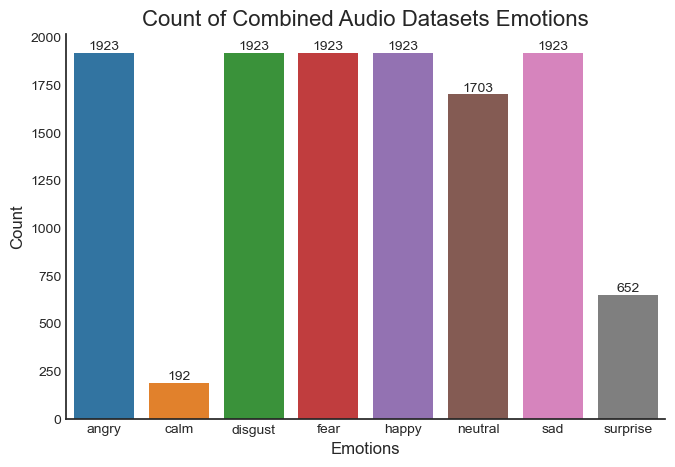

In [94]:
# Combined Data Target
sns_target(SER_audio_df,'Combined Audio Datasets')

### Audio emotion wave plot

In [95]:
# Create waveplots of audio file
def create_waveplot(path, emotion):
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

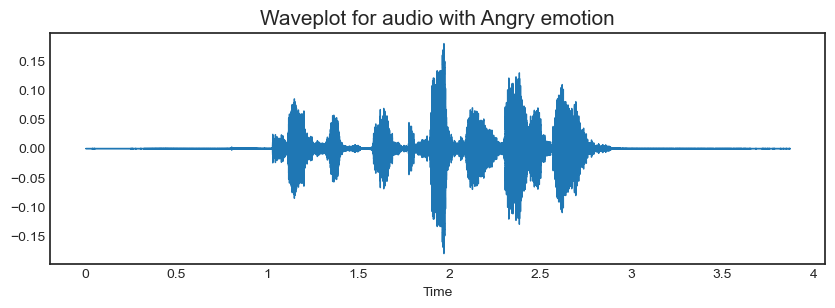

In [96]:
# Angry emotion waveplot
emotion='Angry'
path = 'data/Audio/RAVDESS/Actor_01/03-01-05-01-01-01-01.wav'
create_waveplot(path, emotion)
Audio(path)

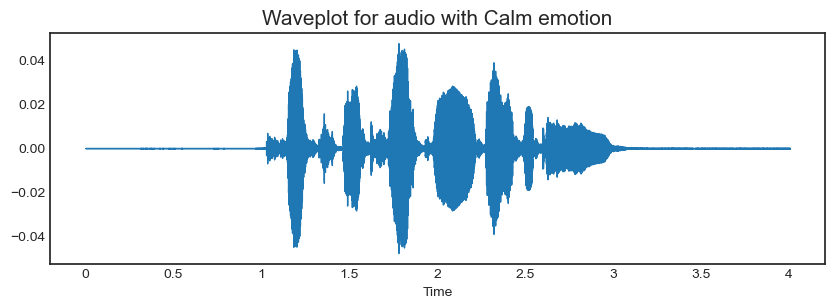

In [97]:
# Calm emotion waveplot
emotion='Calm'
path = 'data/Audio/RAVDESS/Actor_02/03-01-02-01-01-02-02.wav'
create_waveplot(path, emotion)
Audio(path)

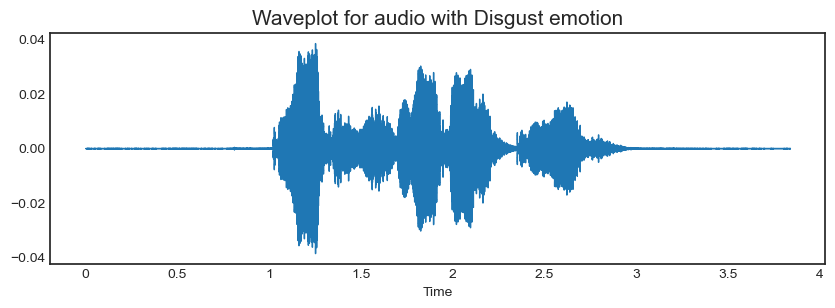

In [98]:
# Disgust emotion waveplot
emotion='Disgust'
path = 'data/Audio/RAVDESS/Actor_01/03-01-07-01-02-02-01.wav'
create_waveplot(path, emotion)
Audio(path)

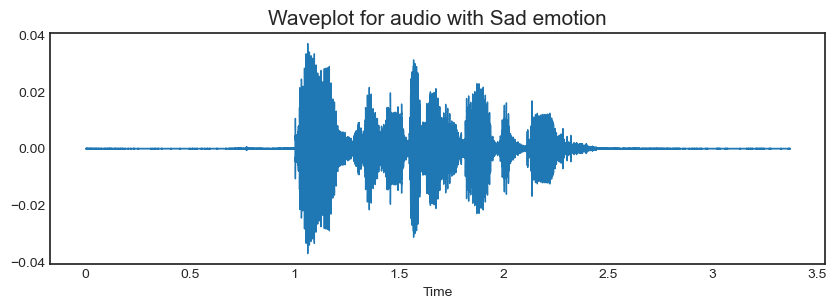

In [99]:
# Sad emotion waveplot
emotion='Sad'
path = 'data/Audio/RAVDESS/Actor_01/03-01-04-01-02-02-01.wav'
create_waveplot(path, emotion)
Audio(path)

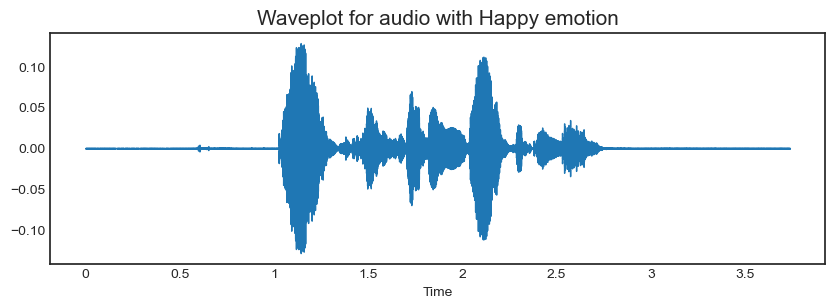

In [100]:
# Happy emotion waveplot
emotion='Happy'
path = 'data/Audio/RAVDESS/Actor_02/03-01-03-01-02-02-02.wav'
create_waveplot(path, emotion)
Audio(path)

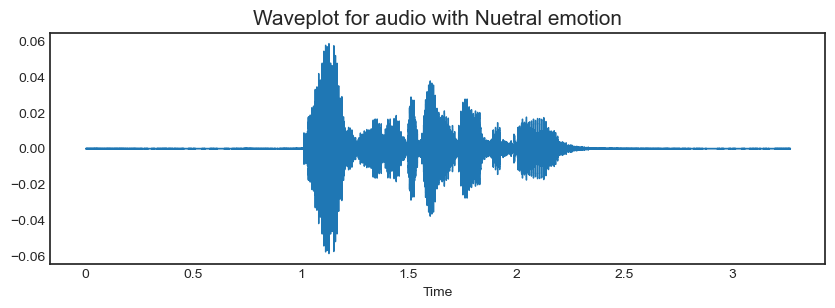

In [101]:
# Nuetral emotion waveplot
emotion='Nuetral'
path = 'data/Audio/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav'
create_waveplot(path, emotion)
Audio(path)

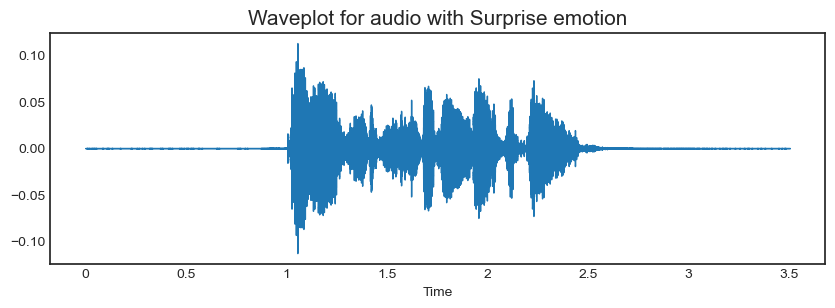

In [102]:
# Surprise emotion waveplot
emotion='Surprise'
path = 'data/Audio/RAVDESS/Actor_01/03-01-08-02-02-01-01.wav'
create_waveplot(path, emotion)
Audio(path)

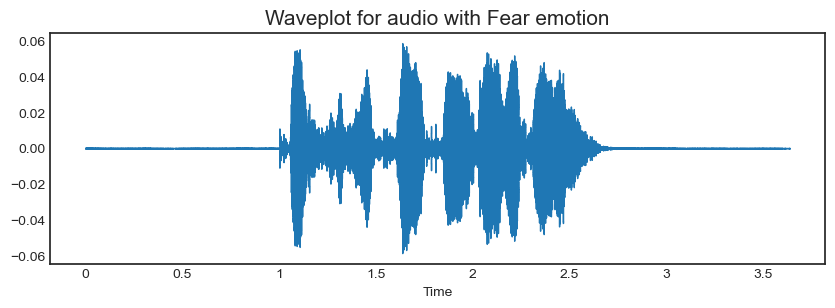

In [103]:
# Fear emotion waveplot
emotion='Fear'
path = 'data/Audio/RAVDESS/Actor_01/03-01-06-01-01-02-01.wav'
create_waveplot(path, emotion)
Audio(path)

In [104]:
augment = audio_augment()

In [105]:
# taking any example and checking for techniques.
path = path = 'data/Audio/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav'
augu_data, augu_sample_rate = librosa.load(path)

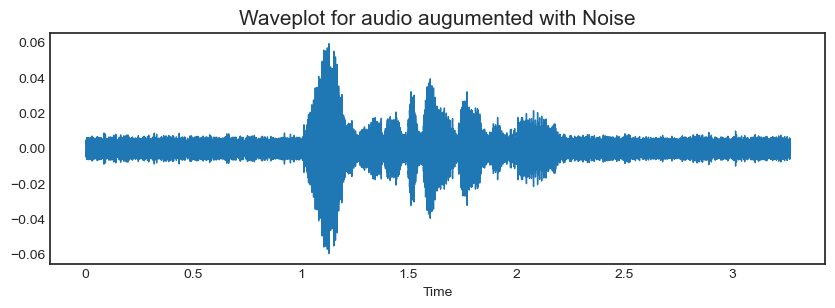

In [106]:
augment_type = 'Noise'
plt.figure(figsize=(10,3))
plt.title(f'Waveplot for audio augumented with {augment_type}', size=15)
x = augment.noise(augu_data)
librosa.display.waveshow(y=x, sr=augu_sample_rate)
# Audio(x, rate=augu_sample_rate)

C:\Users\Dhanasekaran N\AppData\Local\Temp\ipykernel_7520\660532951.py:12: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


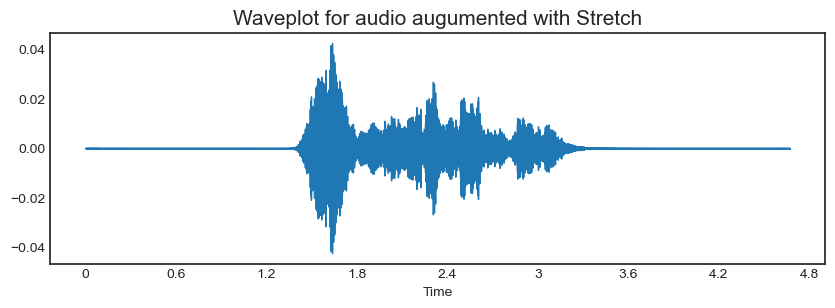

In [107]:
augment_type = 'Stretch'
plt.figure(figsize=(10,3))
plt.title(f'Waveplot for audio augumented with {augment_type}', size=15)
x = augment.stretch(augu_data)
librosa.display.waveshow(y=x, sr=augu_sample_rate)
# Audio(x, rate=augu_sample_rate)

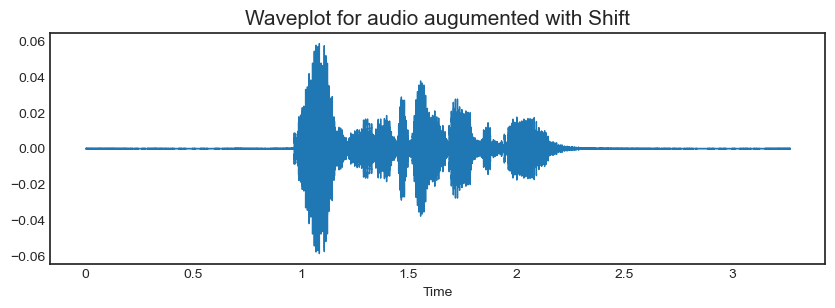

In [108]:
augment_type = 'Shift'
plt.figure(figsize=(10,3))
plt.title(f'Waveplot for audio augumented with {augment_type}', size=15)
x = augment.shift(augu_data)
librosa.display.waveshow(y=x, sr=augu_sample_rate)
# Audio(x, rate=augu_sample_rate)

C:\Users\Dhanasekaran N\AppData\Local\Temp\ipykernel_7520\660532951.py:21: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


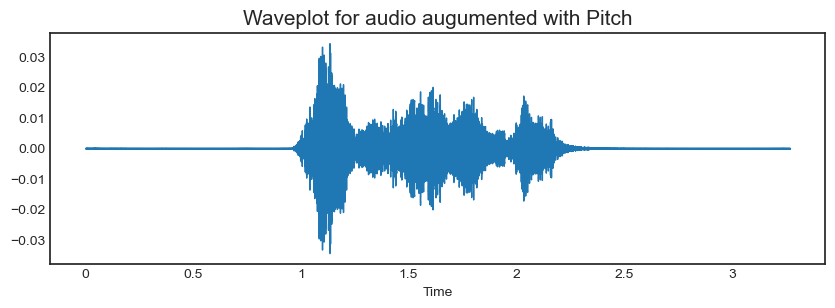

In [109]:
augment_type = 'Pitch'
plt.figure(figsize=(10,3))
plt.title(f'Waveplot for audio augumented with {augment_type}', size=15)
x = augment.pitch(augu_data,augu_sample_rate)
librosa.display.waveshow(y=x, sr=augu_sample_rate)
# Audio(x, rate=augu_sample_rate)

C:\Users\Dhanasekaran N\AppData\Local\Temp\ipykernel_7520\660532951.py:25: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


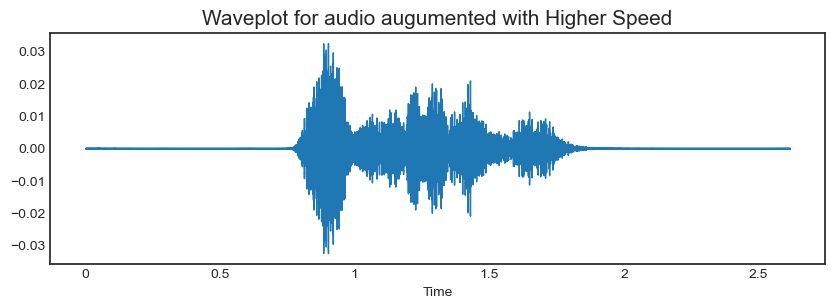

In [110]:
augment_type = 'Higher Speed'
plt.figure(figsize=(10,3))
plt.title(f'Waveplot for audio augumented with {augment_type}', size=15)
x = augment.higher_speed(augu_data)
librosa.display.waveshow(y=x, sr=augu_sample_rate)
# Audio(x, rate=augu_sample_rate)

C:\Users\Dhanasekaran N\AppData\Local\Temp\ipykernel_7520\660532951.py:29: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


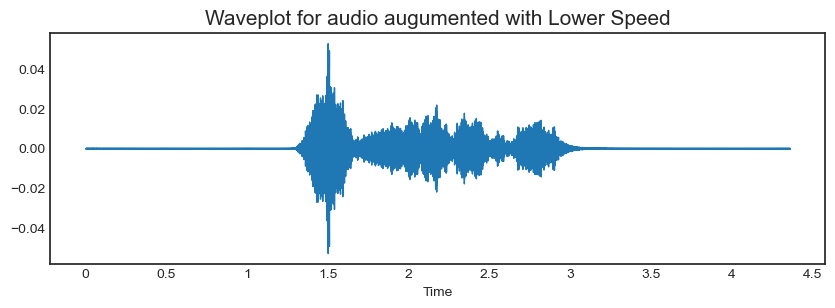

In [111]:
augment_type = 'Lower Speed'
plt.figure(figsize=(10,3))
plt.title(f'Waveplot for audio augumented with {augment_type}', size=15)
x = augment.lower_speed(augu_data)
librosa.display.waveshow(y=x, sr=augu_sample_rate)
# Audio(x, rate=augu_sample_rate)

# Feature Extraction

In [6]:
# extract mfcc features from audio files.

class extract_features:
    augment = audio_augment()
    
    def audio_mfcc(self,data):

        audio_mffcc_features = np.array([])

        # extract mfcc features
        mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
        mfccs_processed = np.mean(mfccs.T,axis=0)
        audio_mffcc_features = np.array(mfccs_processed)

        return audio_mffcc_features
    
    def augment_audio_features(self,data,sample_rate):

        #noised
        noise_data = self.augment.noise(data)
        noised_features = self.audio_mfcc(noise_data)

        #stretched
        stretch_data = self.augment.stretch(data)
        stretched_features = self.audio_mfcc(stretch_data)

        #shifted
        shift_data = self.augment.shift(data)
        shifted_features = self.audio_mfcc(shift_data)

        #pitched
        pitch_data = self.augment.pitch(data, sample_rate)
        pitched_features = self.audio_mfcc(pitch_data)

        #speed up
        higher_speed_data = self.augment.higher_speed(data)
        highspeed_features = self.audio_mfcc(higher_speed_data)

        #speed down
        lower_speed_data = self.augment.higher_speed(data)
        lowspeed_features = self.audio_mfcc(lower_speed_data)
        
        stack_features = np.vstack((noised_features, stretched_features,
                                    shifted_features, pitched_features, highspeed_features, lowspeed_features))

        return stack_features

    def audio_features(self,path):
        # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
        data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 

        # features without augmentation
        base_features = self.audio_mfcc(data)
        
        # features with augmentation
        augment_features = self.augment_audio_features(data,sample_rate)
        
        # stack the features
        stack_audio_features = np.vstack((base_features,augment_features))
        
        return stack_audio_features
    
    def extract_audio_features(self, audio_file_df):
        X,Y = [],[]
        for path,emotion in zip(audio_file_df.path, audio_file_df.labels):
            features = self.audio_features(path)
            #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
            for elem in features: 
                X.append(elem)        
                Y.append(emotion)

        # Create dataframe out of all features
        features_df = pd.DataFrame(X)
        features_df['labels'] = Y
        
        return features_df
    
    def main(self,action, fileDf, dataName):
        # if load(l) then read the already extracted and saved features from CSV file
        if action == "l":
            features_df = pd.read_csv(fileDf)
        # if extract(e) then extract audio features from audio files
        elif action == "e":
            features_df = self.extract_audio_features(fileDf)
            features_df.to_csv(f'data\{dataName}_extracted_features.csv', index=False)
        
        return features_df

In [7]:
%%time

# Create instance of "extract_features" class
ef = extract_features()

# # Load already extracted files
# features_df = ef.main("l", 'data\SER_extracted_features.csv',"SER")

# Extract features from audion files
features_df = ef.main("e",SER_audio_df, "SER")

    

CPU times: total: 1 s
Wall time: 1.06 s


In [8]:
features_df.tail()

0          1         2         3          4         5  \
85129 -512.789978  39.593979 -9.000611  1.464158 -12.044297 -2.932483   
85130 -489.370789  40.365891 -8.681686  3.157223 -11.432261 -2.380734   
85131 -517.685181  39.317867 -9.597177 -0.787233 -12.012350 -5.515183   
85132 -512.053772  45.325783 -9.387683  1.697589 -13.021524 -1.921362   
85133 -512.053772  45.325783 -9.387683  1.697589 -13.021524 -1.921362   

               6         7          8         9  ...        49        50  \
85129 -19.106836 -2.078548 -16.449453  1.622210  ... -1.813296 -0.664052   
85130 -17.886309 -1.718536 -15.227101  2.024086  ... -1.475400 -0.388731   
85131 -18.929850 -4.400561 -15.261017  1.610681  ...  0.559996  1.272384   
85132 -20.592867 -2.077313 -16.985720  2.218421  ... -1.694560 -0.863448   
85133 -20.592867 -2.077313 -16.985720  2.218421  ... -1.694560 -0.863448   

             51        52        53        54        55        56        57  \
85129  1.285525  0.134906 -0.030533  0.871257  1.126768  0.577543  0.270441   
85130  1.378073  0.280543  0.221365  0.857354  1.409415  0.463159  0.093962   
85131 -0.006680  0.750332  1.783859  1.127880  0.346728 -0.384664 -0.016661   
85132  1.147980  0.234945  0.256114  0.645028  1.914743  0.604320  0.270155   
85133  1.147980  0.234945  0.256114  0.645028  1.914743  0.604320  0.270155   

         labels  
85129  surprise  
85130  surprise  
85131  surprise  
85132  surprise  
85133  surprise  

[5 rows x 59 columns]

# Data Preparation

In [9]:
# Prepare the data and split train and test dataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
encoder = OneHotEncoder()

def normalize(raw_X):    
    # scaling our data with sklearn's Standard scaler
    X = scaler.fit_transform(raw_X)
    return X

def encode_target(raw_Y):
    # As this is a multiclass classification problem onehotencoding our Y
    enc_Y =  encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
    return enc_Y

def split_data(X,Y,tst_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=tst_size, shuffle=True)
    return X_train, X_test, y_train, y_test
    

In [10]:
# Normalize and split data to train and test set.

X = features_df.iloc[: ,:-1].values
Y = features_df['labels'].values

# Normalize features
X = normalize(X)

# encode target
Y = encode_target(Y)

#Split train & test set
X_train, X_test, y_train, y_test = split_data(X,Y,0.10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#Split train & validation set
X_train, X_val, y_train, y_val = split_data(X_train, y_train,0.10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(76620, 58) (76620, 8) (8514, 58) (8514, 8)
(68958, 58) (68958, 8) (8514, 58) (8514, 8) (7662, 58) (7662, 8)


In [11]:
# change the shape of input data compatible to model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_val = np.expand_dims(X_val, axis=2)
print(X_train.shape, y_train.shape , X_test.shape , y_test.shape, X_val.shape, y_val.shape)

(68958, 58, 1) (68958, 8) (8514, 58, 1) (8514, 8) (7662, 58, 1) (7662, 8)


In [ ]:
y_train

# Modelling

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [41]:
with strategy.scope():
    
    def build_model(in_shape):

        model=Sequential()
        
        # Conv1D layer with 256 filters and kernel size of 6, Average pooling
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        #model.add(Dropout(0.2))

        # Conv1D layer with 128 filters and kernel size of 6, Average pooling
        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        #model.add(Dropout(0.2))

        # Conv1D layer with 128 filters and kernel size of 6, Average pooling
        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        #model.add(Dropout(0.2))

        # Conv1D layer with 64 filters and kernel size of 6, Max pooling to get the highest value of emotion
        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        # flatten the data to pass into a fully connected Dense layer
        model.add(Flatten())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.3))

        # Output layer with softmax activation function to predict the emotion
        model.add(Dense(units=8, activation='softmax'))
        
        # adam optimizer wtih categorical_crossentropy loss function
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

        return model

    def model_build_summary(input_dim, tr_features, val_features, val_labels):
        model = build_model(input_dim)
        model.summary()

        score = model.evaluate(val_features, val_labels, verbose = 1)
        accuracy = 100*score[1]

        return model


In [55]:
SER_model = None
SER_model = model_build_summary(X_train.shape[1], X_train, X_val, y_val)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d_12 (Averag (None, 29, 256)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_13 (Averag (None, 15, 128)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_14 (Averag (None, 8, 128)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 8, 64)            

In [56]:
# Callbacks and early stopping
callback = ReduceLROnPlateau(monitor='loss', factor=0.1, verbose=0, patience=4, min_lr=0.0001)
# earlyStopping = EarlyStopping(monitor='val_loss', patience=10, mode='auto')

batch_size = 32
n_epochs = 75

In [57]:
%%time
# Train the model
history = SER_model.fit(X_train, y_train, batch_size=batch_size, 
                          epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[callback])

# Save Model
SER_model.save('model\SER_model.h5')

Epoch 1/75
2155/2155 [==============================] - 16s 7ms/step - loss: 1.3861 - accuracy: 0.4485 - val_loss: 1.1316 - val_accuracy: 0.5525
Epoch 2/75
2155/2155 [==============================] - 15s 7ms/step - loss: 1.1601 - accuracy: 0.5412 - val_loss: 1.0537 - val_accuracy: 0.5918
Epoch 3/75
2155/2155 [==============================] - 15s 7ms/step - loss: 1.0839 - accuracy: 0.5726 - val_loss: 0.9996 - val_accuracy: 0.6126
Epoch 4/75
2155/2155 [==============================] - 15s 7ms/step - loss: 1.0248 - accuracy: 0.5984 - val_loss: 0.9401 - val_accuracy: 0.6288
Epoch 5/75
2155/2155 [==============================] - 15s 7ms/step - loss: 0.9629 - accuracy: 0.6237 - val_loss: 0.9096 - val_accuracy: 0.6417
Epoch 6/75
2155/2155 [==============================] - 16s 7ms/step - loss: 0.9094 - accuracy: 0.6467 - val_loss: 0.8436 - val_accuracy: 0.6685
Epoch 7/75
2155/2155 [==============================] - 15s 7ms/step - loss: 0.8609 - accuracy: 0.6659 - val_loss: 0.8343 - val_ac

2155/2155 [==============================] - 16s 7ms/step - loss: 0.2178 - accuracy: 0.9263 - val_loss: 0.5594 - val_accuracy: 0.8641
Epoch 58/75
2155/2155 [==============================] - 15s 7ms/step - loss: 0.2150 - accuracy: 0.9270 - val_loss: 0.5192 - val_accuracy: 0.8722
Epoch 59/75
2155/2155 [==============================] - 16s 7ms/step - loss: 0.2127 - accuracy: 0.9281 - val_loss: 0.4984 - val_accuracy: 0.8777
Epoch 60/75
2155/2155 [==============================] - 16s 8ms/step - loss: 0.2110 - accuracy: 0.9300 - val_loss: 0.5085 - val_accuracy: 0.8697
Epoch 61/75
2155/2155 [==============================] - 16s 7ms/step - loss: 0.2013 - accuracy: 0.9316 - val_loss: 0.5333 - val_accuracy: 0.8697
Epoch 62/75
2155/2155 [==============================] - 16s 7ms/step - loss: 0.2048 - accuracy: 0.9310 - val_loss: 0.5207 - val_accuracy: 0.8692
Epoch 63/75
2155/2155 [==============================] - 16s 7ms/step - loss: 0.2003 - accuracy: 0.9317 - val_loss: 0.5126 - val_accurac

In [72]:
# Load the saved the model.
# SER_model = load_model('model\SER_model.h5')

In [58]:
# Train accuracy
score = SER_model.evaluate(X_train,y_train, verbose = 0)
print("SER training Accuracy: {0:.2%}".format(score[1]))


SER training Accuracy: 97.99%


In [112]:
# Test accuracy
score = SER_model.evaluate(X_test, y_test, verbose=0)
print("SER testing Accuracy: {0:.2%}".format(score[1]))

SER testing Accuracy: 87.80%


In [114]:
%%time
# predicting on test data.
predall_test = SER_model.predict(X_test)
predall_test
y_predall = encoder.inverse_transform(predall_test)
y_testall = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predall.flatten()
df['Actual Labels'] = y_testall.flatten()

df.head(15)

CPU times: total: 297 ms
Wall time: 1.08 s


Predicted Labels Actual Labels
0           neutral       neutral
1             happy         happy
2              fear          fear
3              fear         happy
4           neutral       disgust
5             angry         angry
6              fear       disgust
7           disgust       disgust
8               sad       neutral
9           neutral       neutral
10         surprise      surprise
11          disgust       disgust
12              sad           sad
13            happy         happy
14            angry         angry

In [61]:
print(classification_report(y_testall, y_predall))

              precision    recall  f1-score   support

       angry       0.92      0.94      0.93      1410
        calm       0.93      0.94      0.93       130
     disgust       0.85      0.86      0.85      1384
        fear       0.86      0.88      0.87      1346
       happy       0.85      0.85      0.85      1288
     neutral       0.87      0.87      0.87      1202
         sad       0.89      0.86      0.88      1315
    surprise       0.98      0.96      0.97       439

    accuracy                           0.88      8514
   macro avg       0.90      0.89      0.89      8514
weighted avg       0.88      0.88      0.88      8514



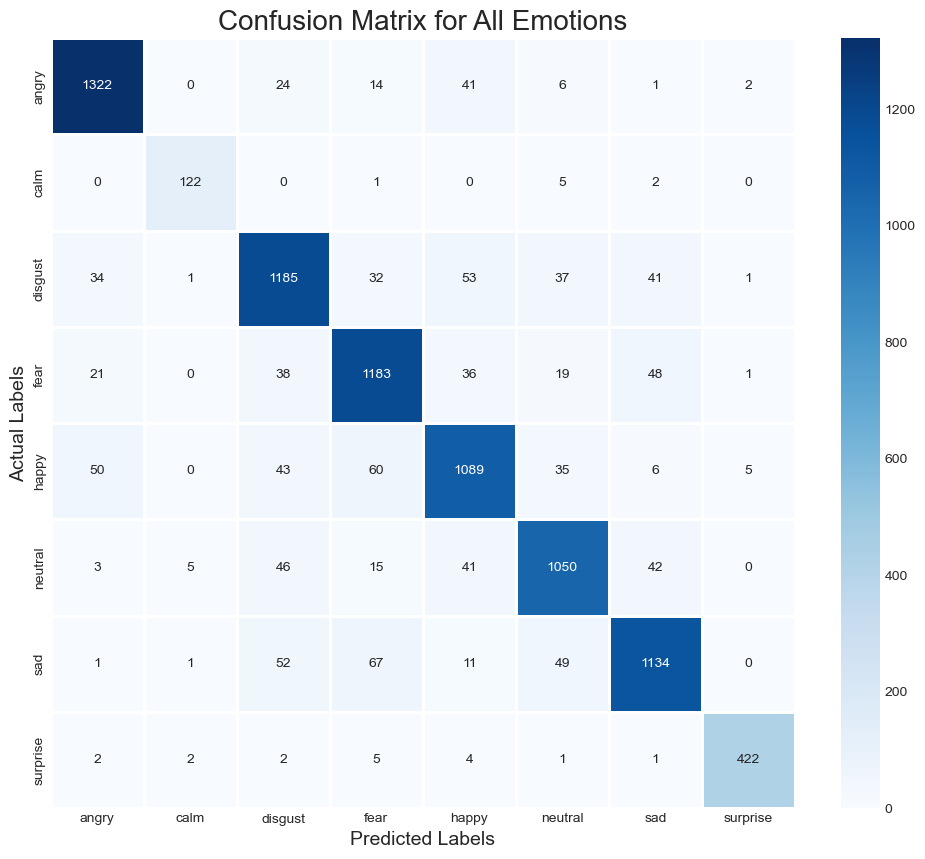

In [62]:
cm = confusion_matrix(y_testall, y_predall)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for All Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [63]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

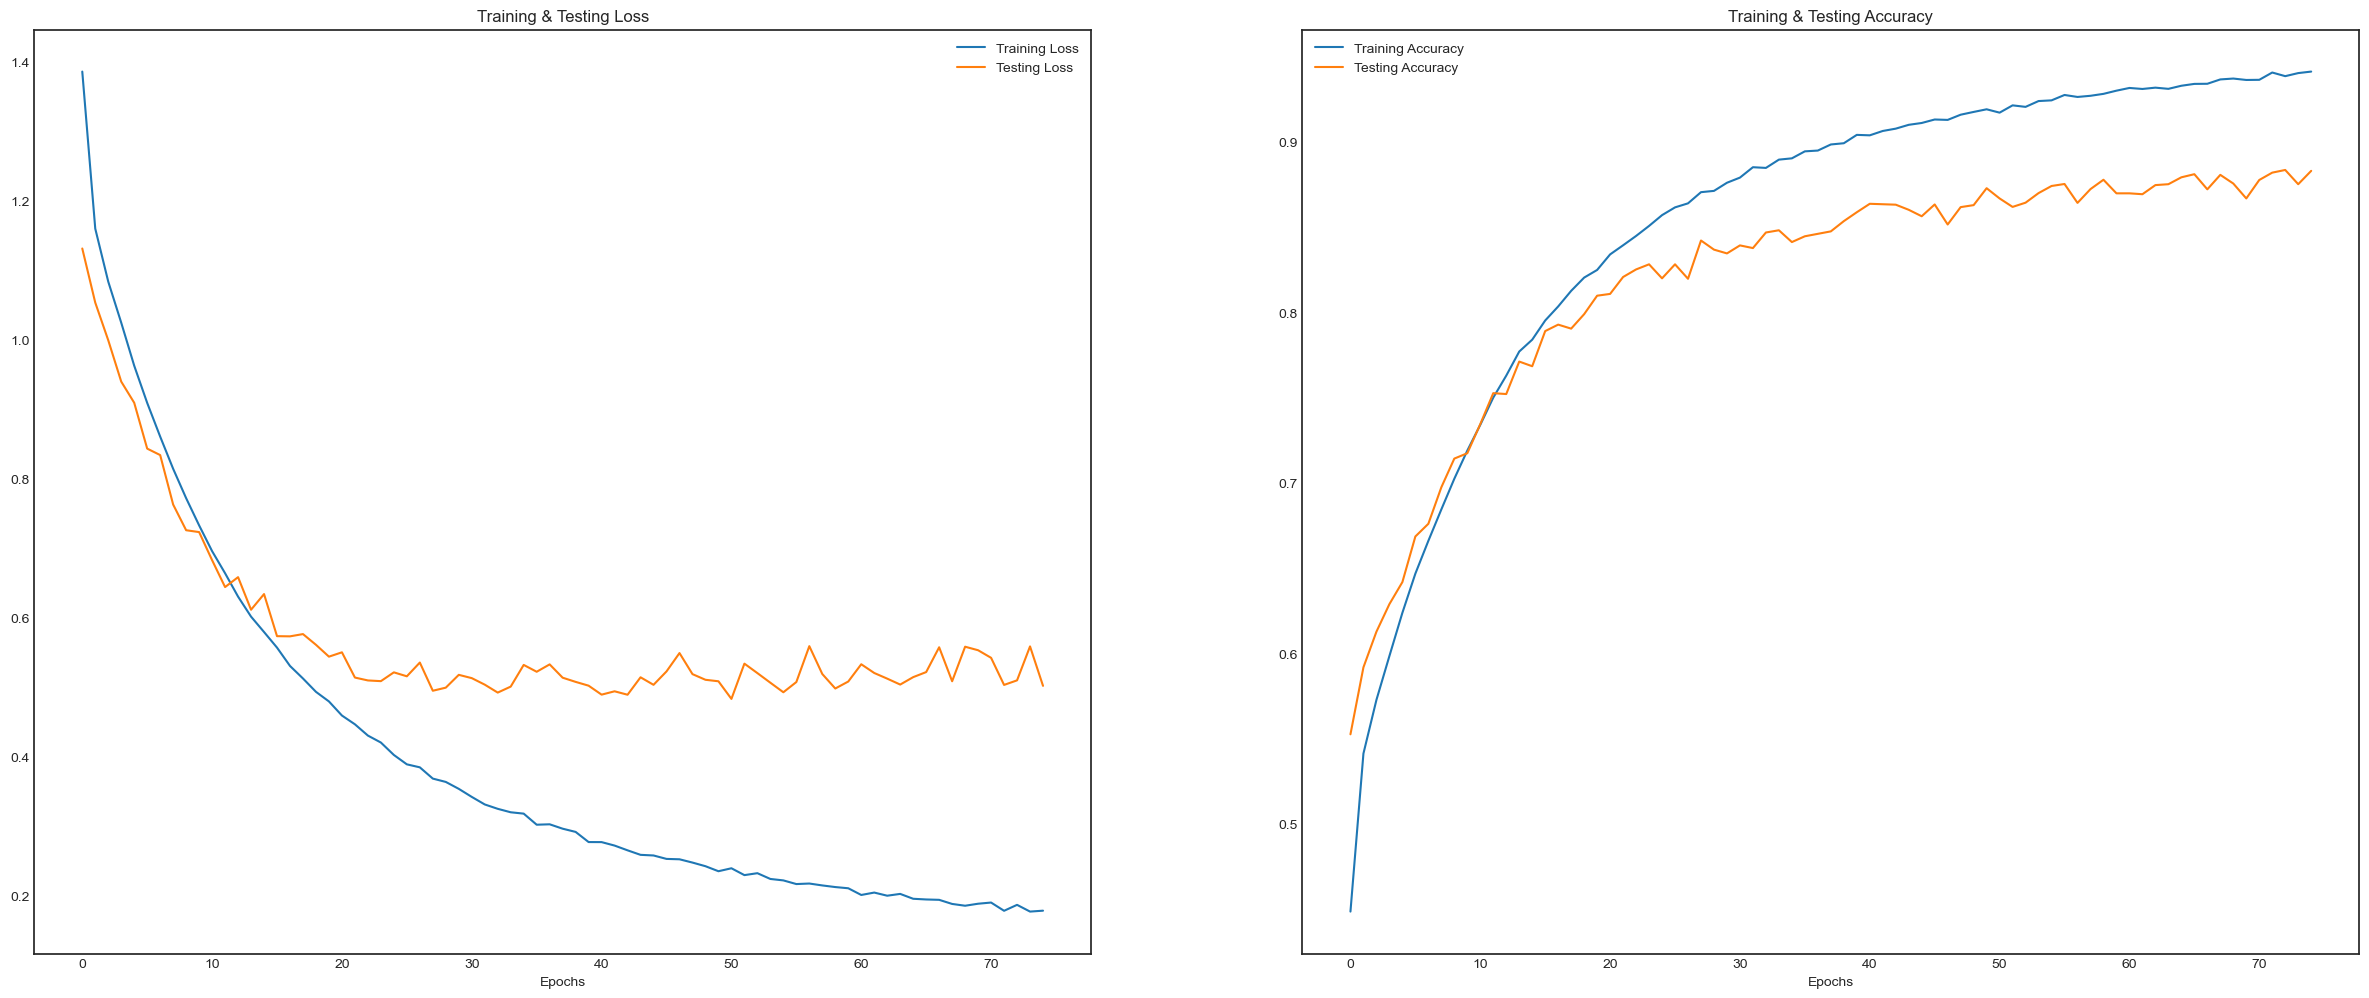

In [64]:
show_graphs(history)
# history.history['loss']

# Live Test

In [115]:
live_test_data = 'data/LiveTest/dhana_happy.wav'
Audio(live_test_data)

In [116]:
%%time
data, sample_rate = librosa.load(live_test_data, duration=3, offset=0.5, res_type='kaiser_fast')
ef = extract_features()
live_X = ef.audio_mfcc(data)
live_X = np.array(live_X)
live_X = np.expand_dims(live_X, axis=0)
live_X = scaler.fit_transform(live_X)
live_X = np.expand_dims(live_X, axis=2)


CPU times: total: 62.5 ms
Wall time: 107 ms


In [118]:
%%time
np.set_printoptions(suppress=True)
pred_live = SER_model.predict(live_X)
pred_live = encoder.inverse_transform(pred_live)
pred_live

CPU times: total: 62.5 ms
Wall time: 87.4 ms


array([['happy']], dtype=object)